<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Métodos de Ensemble: *Boosting*

## Importação das bibliotecas

In [1]:
# Módulos de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Métricas de Desempenho
import preditiva

## Importação da base de dados

In [2]:
df = pd.read_csv('emprestimos.csv', sep=';')
df.head(5)

Idade Genero   Escolaridade Tipo_Moradia Saldo_Investimento  \
0     67      M      Graduacao      Propria   Sem investimento   
1     22      H      Graduacao      Propria              Pouco   
2     49      M  Pos Graduacao      Propria              Pouco   
3     45      M      Graduacao     De favor              Pouco   
4     53      M      Graduacao     De favor              Pouco   

  Saldo_Conta_Corrente  Valor_Emprestimo  Duracao_Emprestimo  Default  
0                Pouco              1169                   6        0  
1             Moderado              5951                  48        1  
2            Sem conta              2096                  12        0  
3                Pouco              7882                  42        0  
4                Pouco              4870                  24        1

## Preparação dos Dados

### Missing Values

In [3]:
df.isnull().sum()

Idade                   0
Genero                  0
Escolaridade            0
Tipo_Moradia            0
Saldo_Investimento      0
Saldo_Conta_Corrente    0
Valor_Emprestimo        0
Duracao_Emprestimo      0
Default                 0
dtype: int64

### Duplicações

In [4]:
df.duplicated().sum()

0

### Tipos de Variáveis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Genero                1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Default               1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

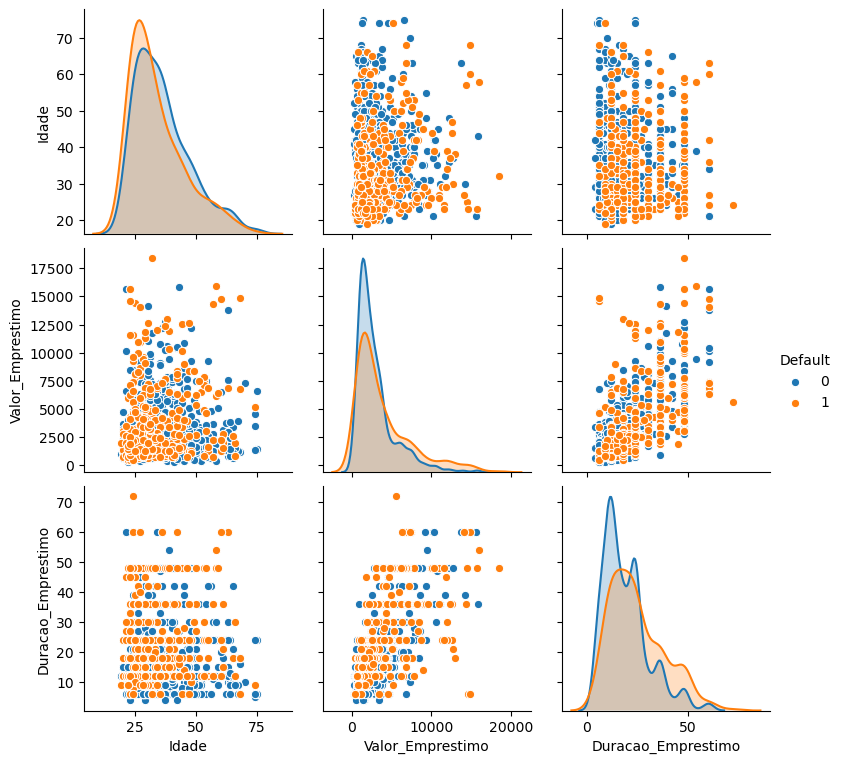

In [6]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df, hue='Default');

### Relatórios Pandas Profiling e SweetViz

In [7]:
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df,
                                                     target_feat='Default')
sns.reset_defaults()

:TARGET::                          |██                   | [ 10%]   00:00  -> (00:00 left)

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Desenvolvimento dos Modelos

### Definição do *Target* e das *Features*

In [8]:
# Target (variável resposta)
y_var = 'Default'
y = df[y_var]

# Features (variáveis explicativas)
x_var = ['Idade', 'Genero', 'Escolaridade', 'Tipo_Moradia', 
         'Saldo_Investimento', 'Saldo_Conta_Corrente',
         'Valor_Emprestimo', 'Duracao_Emprestimo']
x = pd.get_dummies(df[x_var])

In [9]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Default, dtype: int64

In [10]:
x.head()

Idade  Valor_Emprestimo  Duracao_Emprestimo  Genero_H  Genero_M  \
0     67              1169                   6         0         1   
1     22              5951                  48         1         0   
2     49              2096                  12         0         1   
3     45              7882                  42         0         1   
4     53              4870                  24         0         1   

   Escolaridade_Ensino Medio  Escolaridade_Graduacao  \
0                          0                       1   
1                          0                       1   
2                          0                       0   
3                          0                       1   
4                          0                       1   

   Escolaridade_Pos Graduacao  Tipo_Moradia_Alugada  Tipo_Moradia_De favor  \
0                           0                     0                      0   
1                           0                     0                      0   
2                           1                     0                      0   
3                           0                     0                      1   
4                           0                     0                      1   

   Tipo_Moradia_Propria  Saldo_Investimento_Alto  Saldo_Investimento_Moderado  \
0                     1                        0                            0   
1                     1                        0                            0   
2                     1                        0                            0   
3                     0                        0                            0   
4                     0                        0                            0   

   Saldo_Investimento_Pouco  Saldo_Investimento_Sem investimento  \
0                         0                                    1   
1                         1                                    0   
2                         1                                    0   
3                         1                                    0   
4                         1                                    0   

   Saldo_Conta_Corrente_Alto  Saldo_Conta_Corrente_Moderado  \
0                          0                              0   
1                          0                              1   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   Saldo_Conta_Corrente_Pouco  Saldo_Conta_Corrente_Sem conta  
0                           1                               0  
1                           0                               0  
2                           0                               1  
3                           1                               0  
4                           1                               0

### Divisão das bases em Treino e Teste

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [12]:
x_train.shape

(700, 19)

In [13]:
x_test.shape

(300, 19)

### Métodos de Ensemble: *Boosting* - **AdaBoost**

In [14]:
modelo_ada = AdaBoostClassifier(n_estimators=50,
                                learning_rate = 0.2,
                                random_state = 42)

modelo_ada.fit(x_train, y_train)

# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_ada, x_train, y_train, x_test, y_test)

Treino     Teste  Variação
Acurácia   0.742857  0.726667     -0.02
AUROC      0.796251  0.765366     -0.04
KS         0.477962  0.477365     -0.00
Precision  0.674699  0.636364     -0.06
Recall     0.267943  0.230769     -0.14
F1         0.383562  0.338710     -0.12

### Métodos de Ensemble: *Boosting* - **Gradient Boosting**

In [15]:
modelo_gb = GradientBoostingClassifier(n_estimators=50, 
                                       learning_rate = 0.2,
                                       subsample=0.4,
                                       min_samples_leaf=10,
                                       max_depth=1,
                                       random_state = 42)

modelo_gb.fit(x_train, y_train)

# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_gb, x_train, y_train, x_test, y_test)

Treino     Teste  Variação
Acurácia   0.754286  0.736667     -0.02
AUROC      0.785503  0.757295     -0.04
KS         0.475633  0.429518     -0.10
Precision  0.643411  0.625000     -0.03
Recall     0.397129  0.329670     -0.17
F1         0.491124  0.431655     -0.12

### Importância das Variáveis

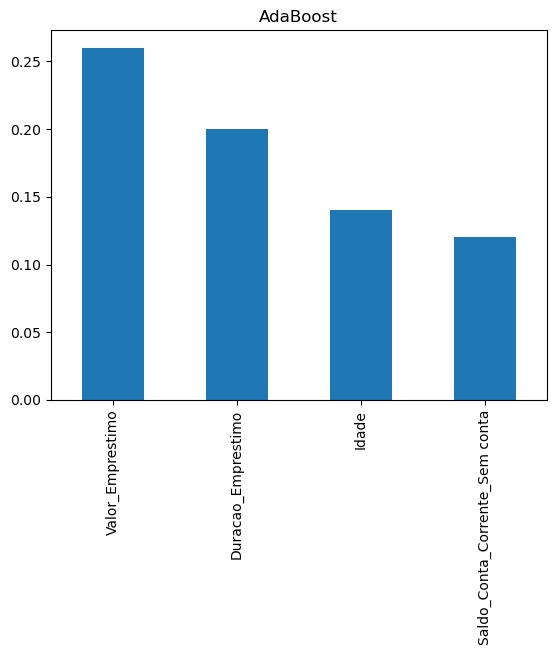

In [18]:
# Importância das variáveis no AdaBoost
%matplotlib inline
modelo_ada_feat_importances = pd.Series(modelo_ada.feature_importances_,
                                       index=x.columns)
modelo_ada_feat_importances.nlargest(4).plot(kind='bar', title='AdaBoost');

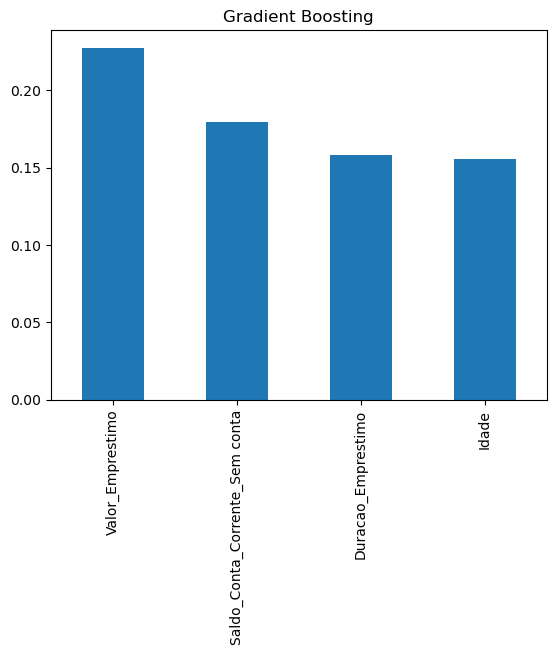

In [19]:
# Importância das variáveis no Gradient Boosting
%matplotlib inline
modelo_gb_feat_importances = pd.Series(modelo_gb.feature_importances_,
                                       index=x.columns)
modelo_gb_feat_importances.nlargest(4).plot(kind='bar', title='Gradient Boosting');